In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## NewYork City Bike
在预测模型训练之前对数据进行清洗， 数据清洗的代码已经整理在 `citibikeUtil.py`中，预测器的代码已经整理在`predictor.py`中，
`citybikeDraw.py`是用来生成图片的文件 `citybikeMetrics.py`计算指标

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from citybikeUtil import CB201808, CB201809, CB201810, CB201811, CB201812, CB201901

from predictor import DecisionTreePredictor, XGBoostPredictor

## XgboostPredictor

In [3]:
xgb = XGBoostPredictor()

### 训练模型

In [130]:
test_x, test_y = xgb.get_train_vec([CB201809])

100%|██████████| 1/1 [00:18<00:00, 18.40s/it]


In [131]:
train_x, train_y = xgb.get_train_vec([CB201808])

100%|██████████| 1/1 [00:19<00:00, 19.33s/it]


In [ ]:
predictor = xgb.train_model(train_x, train_y, [(test_x, test_y)])

In [133]:
predict_y = predictor.predict(test_x)

In [134]:
len(predict_y), len(test_y)

(720, 720)

### 根据预测结果的个数生成 时间间隔 

预测月份是11月份 freq代表频率 'H'代表小时 每小时生成一个

### 使用seaborn画图需要将数据合成df

In [135]:
date_index = pd.date_range(start='2018-11-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
xgb_df = pd.DataFrame(merge_data, index=date_index)

## 实验结果展示

In [136]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

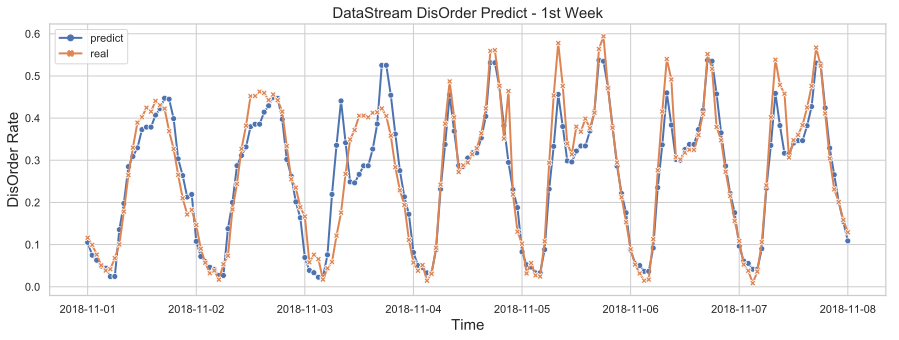

In [137]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(figsize = (15, 5))
# 设置图名称
ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('DisOrder Rate',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=xgb_df[:169])

## 封装成一个画图类

In [ ]:
from citybikeDraw import DrawXgboost
draw = DrawXgboost()
test_y, predict_y = draw.get_predict_result([CB201808], [CB201809])

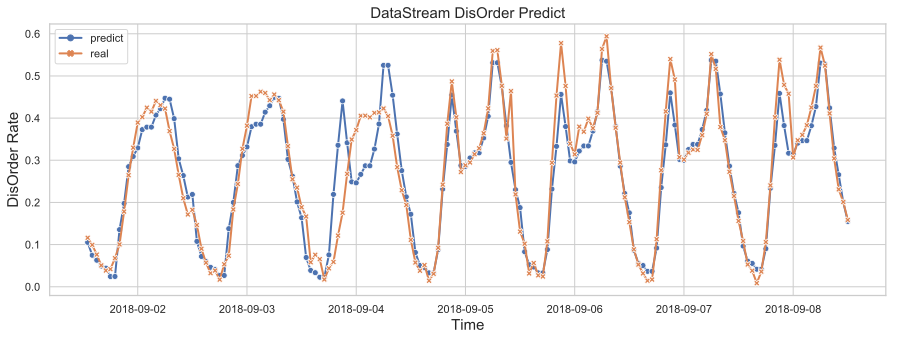

In [10]:
draw.draw_real_predict(
    week_num=1,
    start_time="2018-09-01 13:00:00",
    title="DataStream DisOrder Predict",
    figsize=(15,5)
)

## 回归性能指标

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [15]:
from citybikeMetrics import get_xgb_metrics
import pandas as pd
from citybikeUtil import CB201808, CB201809, CB201810, CB201811, CB201812, CB201901, CB201902

In [16]:
months = [CB201808, CB201809, CB201810, CB201811, CB201812, CB201901, CB201902]

In [ ]:
update_metrics = get_xgb_metrics(months, True)
unupdate_metrics = get_xgb_metrics(months, False)
result = pd.concat([update_metrics,unupdate_metrics], axis=1)
result.columns = [["Update Model","Update Model","Update Model","UnUpdate Model","UnUpdate Model","UnUpdate Model"],["RMSE", "MAE", "R2S","RMSE", "MAE", "R2S"]]

In [18]:
result

Update Model                      UnUpdate                    
                   RMSE       MAE       R2S      RMSE       MAE       R2S
2018-09-01     0.081690  0.035753  0.779135  0.081690  0.035753  0.779135
2018-10-01     0.118296  0.059167  0.657203  0.107515  0.045198  0.716839
2018-11-01     0.145421  0.090964  0.639908  0.175422  0.124413  0.476003
2018-12-01     0.132834  0.066018  0.645610  0.149476  0.093110  0.551249
2019-01-01     0.113987  0.054260  0.735102  0.131754  0.093034  0.646086
2019-02-01     0.089237  0.042199  0.849890  0.146886  0.090843  0.593290